In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# from datasets import load_dataset

# dataset = load_dataset("yelp_review_full")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import pickle
# with open('yelp_dataset.pkl', 'wb') as file:
#     pickle.dump(dataset, file)

In [7]:
with open('dbpedia.pkl', 'rb') as file:
    dataset = pickle.load(file)

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['label', 'title', 'content'],
        num_rows: 70000
    })
})


In [9]:
train_dataset = dataset['train']
test_dataset = dataset['test']

# Convert train and test datasets to arrays
train_data_title = train_dataset['title']
train_data_content = train_dataset['content']
train_labels = train_dataset['label']
test_data_title = test_dataset['title']
test_data_content = test_dataset['content']
test_labels = test_dataset['label']

In [26]:
# print(train_data_title[0])
# print(train_data_content[0])
# print(train_labels[0])


In [10]:
# train_data = train_data_title + train_data_content
# test_data = test_data_title + test_data_content

train_data = [None] * len(train_data_title)
for i in range(len(train_data_title)):
    train_data[i] = train_data_title[i] + train_data_content[i]

test_data = [None] * len(test_data_title)
for i in range(len(test_data_title)):
    test_data[i] = test_data_title[i] + test_data_content[i]

## Preprocess

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/revanthgundam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/revanthgundam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import sys  
!{sys.executable} -m pip install contractions
import contractions


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [30]:
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# nltk.download('punkt')

# def custom_contractions_fix(text):
#     # Define custom contractions to expand
#     contractions_dict = {
#         "don't": "do not",
#         "doesn't": "does not",
#         "didn't": "did not",
#         # Add more contractions as needed
#     }
    
#     # Use a regular expression to find and replace contractions
#     contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    
#     def replace(match):
#         return contractions_dict[match.group(0)]
    
#     expanded_text = contractions_re.sub(replace, text)
#     return expanded_text


# def tokenize_text(text):
    
#     # if there is a word between () then write it twice
#     text = re.sub(r'\((.*?)\)', r'\1 \1', text)
    
#     # Apply custom contractions expansion
#     text = custom_contractions_fix(text)
    
#     # Replace hyphens with spaces
#     text = text.replace('-', ' ')
    
#     tokens = nltk.word_tokenize(text)
    
#     # Add an extra occurrence for all-uppercase words with more than one letter
#     temp = [word for word in tokens if len(word) > 1 and word.isupper()]
#     tokens.extend(temp)
    
#     # Convert to lowercase
#     tokens = [w.lower() for w in tokens]
    
#     # Remove periods
#     tokens = [w.replace('.', '') for w in tokens]
    
#     # Remove punctuation and stopwords
#     stop_words = set(stopwords.words("english"))
#     tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
#     return tokens



In [31]:
# # print(tokenize_text(train_data[10]))

# tokens = []
# print(len(train_data))

# for i in range(len(train_data)):
#     tokens.append(tokenize_text(train_data[i]))
#     if i % 1000 == 0:
#         print(i)

# # save to pkl file
# with open('dbpedia_train_tokens_no_stop.pkl', 'wb') as file:
#     pickle.dump(tokens, file)

In [32]:
# import pickle
# from collections import Counter

# # Load the tokenized data
# with open('dbpedia_train_tokens_no_stop.pkl', 'rb') as file:
#     tokens = pickle.load(file)

# # Define the frequency cutoff threshold
# frequency_cutoff = 30

# # Count word frequencies
# word_counts = Counter(word for tokens_list in tokens for word in tokens_list)

# # Filter out words with counts less than the threshold
# filtered_tokens = [[word for word in tokens_list if word_counts[word] >= frequency_cutoff] for tokens_list in tokens]

# # Save the filtered tokens to a new file
# with open('dbpedia_train_tokens_filtered.pkl', 'wb') as file:
#     pickle.dump(filtered_tokens, file)

In [33]:
# tokens_test = []
# print(len(test_data))

# for i in range(len(test_data)):
#     tokens_test.append(tokenize_text(test_data[i]))
#     if i % 1000 == 0:
#         print(i)

# with open('dbpedia_test_tokens_no_stop.pkl', 'wb') as file:
#     pickle.dump(tokens_test, file)

In [34]:
# import pickle
# from collections import Counter

# # Load the tokenized data
# with open('dbpedia_test_tokens_no_stop.pkl', 'rb') as file:
#     tokens = pickle.load(file)

# # Define the frequency cutoff threshold
# frequency_cutoff = 30

# # Count word frequencies
# word_counts = Counter(word for tokens_list in tokens for word in tokens_list)

# # Filter out words with counts less than the threshold
# filtered_tokens = [[word for word in tokens_list if word_counts[word] >= frequency_cutoff] for tokens_list in tokens]

# # Save the filtered tokens to a new file
# with open('dbpedia_test_tokens_filtered.pkl', 'wb') as file:
#     pickle.dump(filtered_tokens, file)

In [13]:
import numpy as np

train_tokens = []
with open('dbpedia_train_tokens_filtered.pkl', 'rb') as file:
    train_tokens = pickle.load(file)

test_tokens = []
with open('dbpedia_test_tokens_filtered.pkl', 'rb') as file:
    test_tokens = pickle.load(file)
    
print("Loaded tokens")



Loaded tokens


In [14]:
# in train data replace every 1000th word with UNK randomly

import random
# set a seed
random.seed(42)

for i in range(len(train_tokens)):
    for j in range(len(train_tokens[i])):
        if random.randint(1, 1000) == 1:
            train_tokens[i][j] = 'UNK'
        

In [15]:
# Build the BoW representation manually
# Create a vocabulary by collecting unique words from the training data
vocab = set()
for tokens in train_tokens:
    vocab.update(tokens)

# Create a dictionary to map words to indices in the vocabulary
vocab_dict = {}
for i, word in enumerate(vocab):
    vocab_dict[word] = i

print(len(vocab_dict))
# Initialize BoW matrices for training and testing data


36315


In [16]:
# randomize the order of the training data and the testing data along with their labels with a specific seed
import random

random_seed = 42

train_data = []
new_train_labels = []

test_data = []
new_test_labels = []

for i in range(len(train_tokens)):
    train_data.append(train_tokens[i])
    new_train_labels.append(train_labels[i])

for i in range(len(test_tokens)):
    test_data.append(test_tokens[i])
    new_test_labels.append(test_labels[i])

# shuffle the data
random.seed(random_seed)
temp = list(zip(train_data, new_train_labels))
random.shuffle(temp)
train_data, train_labels = zip(*temp)

random.seed(random_seed)
temp = list(zip(test_data, new_test_labels))
random.shuffle(temp)
test_data, test_labels = zip(*temp)

# convert them back to the format of train_tokens and test_tokens
train_tokens = list(train_data)
train_labels = list(train_labels)
test_tokens = list(test_data)
test_labels = list(test_labels)


In [18]:
# # save the new train and test data
with open('dbpedia_train_tokens_filtered_new.pkl', 'wb') as file:
    pickle.dump(train_tokens, file)

with open('dbpedia_test_tokens_filtered_new.pkl', 'wb') as file:
    pickle.dump(test_tokens, file)

with open('dbpedia_train_labels_new.pkl', 'wb') as file:
    pickle.dump(train_labels, file)

with open('dbpedia_test_labels_new.pkl', 'wb') as file:
    pickle.dump(test_labels, file)

# Load the tokenized data
with open('dbpedia_train_tokens_filtered_new.pkl', 'rb') as file:
    train_tokens = pickle.load(file)

with open('dbpedia_test_tokens_filtered_new.pkl', 'rb') as file:
    test_tokens = pickle.load(file)

with open('dbpedia_train_labels_new.pkl', 'rb') as file:
    train_labels = pickle.load(file)

with open('dbpedia_test_labels_new.pkl', 'rb') as file:
    test_labels = pickle.load(file)

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

num_epochs = 4
learning_rate = 0.01
batch_size = 10000

class BoWClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Pass the input through the linear layer
        out = self.linear(x)
        return out
    
# Define the model
input_size = len(vocab)  # Input size is the size of the vocabulary
output_size = 14  # Output size is 13 dimensions

model = BoWClassifier(input_size, output_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
# Training loop
for epoch in range(num_epochs):
    total = 0
    correct = 0
    for i in range(0, len(train_tokens), batch_size):
        
        inputs = train_tokens[i:i + batch_size]
        # print(len(inputs))
        # print(len(vocab))
        
        # make bow vector for inputs
        bow = torch.zeros((batch_size, len(vocab)), dtype=torch.float32)
        # print(bow.shape)
        for j in range(batch_size):
            for token in inputs[j]:

                bow[j][vocab_dict[token]] += 1

        
        # convert bow to tensor
        inputs = torch.tensor(bow, dtype=torch.float32).to(device)
        
        labels = train_labels[i:i + batch_size]  # Make sure to have train_labels defined
        # Convert labels to LongTensors
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()

        # Update weights
        optimizer.step()

        # calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        # Print the loss for this batch if needed
        print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i//batch_size+1}], Loss: {loss.item()}')

    print(f'Accuracy of the network on the {total} train inputs: {100 * correct / total} %')

print('Training finished')

/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_26971/2154661103.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(bow, dtype=torch.float32).to(device)


Epoch [1/4], Batch [1], Loss: 3.524308681488037
Epoch [1/4], Batch [2], Loss: 3.2244842052459717
Epoch [1/4], Batch [3], Loss: 2.97080135345459
Epoch [1/4], Batch [4], Loss: 2.704965353012085
Epoch [1/4], Batch [5], Loss: 2.4792983531951904
Epoch [1/4], Batch [6], Loss: 2.2530932426452637
Epoch [1/4], Batch [7], Loss: 2.0399506092071533
Epoch [1/4], Batch [8], Loss: 1.8610588312149048
Epoch [1/4], Batch [9], Loss: 1.68220853805542
Epoch [1/4], Batch [10], Loss: 1.5291893482208252
Epoch [1/4], Batch [11], Loss: 1.389919400215149
Epoch [1/4], Batch [12], Loss: 1.2626203298568726
Epoch [1/4], Batch [13], Loss: 1.1747325658798218
Epoch [1/4], Batch [14], Loss: 1.071852207183838
Epoch [1/4], Batch [15], Loss: 1.0020349025726318
Epoch [1/4], Batch [16], Loss: 0.9164405465126038
Epoch [1/4], Batch [17], Loss: 0.8462718725204468
Epoch [1/4], Batch [18], Loss: 0.7787591814994812
Epoch [1/4], Batch [19], Loss: 0.7518943548202515
Epoch [1/4], Batch [20], Loss: 0.696808397769928
Epoch [1/4], Batch

In [24]:
# save the above model in its entirety in pkl file
torch.save(model, 'bow_model_dbpedia.pkl')
torch.save(model.state_dict(), 'bow_model_dbpedia.pth')

# load the model
# model = torch.load('bow_model_dbpedia.pkl')

# Define the model architecture
# loaded_model = BoWClassifier(input_size, output_size).to(device)

# Load the model's state dictionary
# loaded_model.load_state_dict(torch.load('bow_model_dbpedia.pth'))

# model = loaded_model
model.load_state_dict(torch.load('bow_model_dbpedia.pth'))

<All keys matched successfully>

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Test the model
with torch.no_grad():
    model.eval()
    total = 0
    correct = 0
    predictions = []
    true_labels = []

    for i in range(0, len(test_tokens), batch_size):
        inputs = test_tokens[i:i + batch_size]
        bow = torch.zeros((batch_size, len(vocab)), dtype=torch.float32)

        for j in range(batch_size):
            for token in inputs[j]:
                if token in vocab_dict:
                    bow[j][vocab_dict[token]] += 1
                else:
                    bow[j][vocab_dict['UNK']] += 1

        inputs = torch.tensor(bow, dtype=torch.float32).to(device)
        labels = test_labels[i:i + batch_size]
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect predictions and true labels
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the {total} test inputs: {accuracy} %')

    # Calculate confusion matrix, precision, recall, and F1 scores
    confusion = confusion_matrix(true_labels, predictions)
    classification_rep = classification_report(true_labels, predictions, target_names=[str(i) for i in range(14)])
    f1_micro = f1_score(true_labels, predictions, average='micro')
    f1_macro = f1_score(true_labels, predictions, average='macro')
    f1_weighted = f1_score(true_labels, predictions, average='weighted')
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')

    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    # print("F1 Micro:", f1_micro)
    # print("F1 Macro:", f1_macro)
    # print("F1 Weighted:", f1_weighted)
    # print("Precision:", precision)
    # print("Recall:", recall)


/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_26971/913978546.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(bow, dtype=torch.float32).to(device)


Accuracy of the network on the 70000 test inputs: 97.12428571428572 %
Confusion Matrix:
[[4685   52   29    6   15   45   58    7    6    7    9   23   13   45]
 [  38 4897    5    1   10    0   31    3    4    3    2    0    3    3]
 [  34    9 4691   18   77    1    8    5    0    8    3   51   31   64]
 [   3    2   31 4933   11    0    3    3    0    8    1    1    3    1]
 [  10    9   75   11 4865    2    7    5    2    3    0    2    3    6]
 [  44    0    4    1    1 4920   13    6    3    1    1    1    3    2]
 [  66   44    6    0   14   14 4784   44   11    3    2    1    4    7]
 [   4    0    0    0    2    2   25 4949   11    3    2    1    0    1]
 [   5    0    1    0    2    1   10   13 4968    0    0    0    0    0]
 [   1    2    2    1    0    0    2    7    4 4882   98    0    0    1]
 [  12    1    2    0    0    3    1    8    1  119 4850    0    1    2]
 [   4    1   33    1    1    1    3    3    2    1    2 4924   18    6]
 [  10    3   19    4    0    1    2

In [26]:
# get the misclassifications and print few of them
misclassified = []
for i in range(len(true_labels)):
    if true_labels[i] != predictions[i]:
        misclassified.append(i)

# print("Misclassified indices:", misclassified[:10])


In [27]:
# use the misclassified indices to print the misclassified examples
for i in range(10):
    print("Misclassified example:")
    print("True label:", true_labels[misclassified[i]])
    print("Predicted label:", predictions[misclassified[i]])
    print("Text:", test_data[misclassified[i]])
    print("")

Misclassified example:
True label: 13
Predicted label: 10
Text: ['bimonthly', 'magazine', 'north', 'america', 'central', 'america', 'south', 'america', 'published', 'inc']

Misclassified example:
True label: 3
Predicted label: 2
Text: ['robin', 'martin', 'jenkins', 'robin', 'simon', 'christopher', 'martin', 'jenkins', 'born', 'october', 'surrey', 'england', 'born', 'october', 'surrey', 'england', 'english', 'cricketer', 'played', 'sussex', 'ccc', 'british', 'universities', 'six', 'feet', 'inches', 'tall', 'son', 'christopher', 'martin', 'jenkins', 'cricket', 'writer', 'commentator', 'martin', 'jenkins', 'educated', 'college', 'college', 'house', 'time', 'andrew', 'ben', 'ccc']

Misclassified example:
True label: 4
Predicted label: 0
Text: ['native', 'spain', 'spanish', 'governor', 'general', 'philippines', 'december', 'march', 'among', 'archipelago', 'account', 'ability', 'public', 'welfare', 'especially', 'active', 'building', 'providing', 'means', 'communication', 'bring', 'inland', 

In [28]:
# Initialize a dictionary to store length-wise statistics
length_correct_total = {}

# Test the model
with torch.no_grad():
    model.eval()
    total = 0
    correct = 0
    predictions = []
    true_labels = []

    for i in range(0, len(test_tokens), batch_size):
        inputs = test_tokens[i:i + batch_size]
        bow = torch.zeros((batch_size, len(vocab)), dtype=torch.float32)

        for j in range(batch_size):
            for token in inputs[j]:
                if token in vocab_dict:
                    bow[j][vocab_dict[token]] += 1
                else:
                    bow[j][vocab_dict['UNK']] += 1

        inputs = torch.tensor(bow, dtype=torch.float32).to(device)
        labels = test_labels[i:i + batch_size]
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Collect predictions and true labels
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

        # Update length-wise statistics
        for j in range(len(inputs)):
            length = int(torch.sum(inputs[j] != 0).item())
            # print(length)
            if length not in length_correct_total:
                length_correct_total[length] = [0, 0]
            if predicted[j] == labels[j]:
                length_correct_total[length][0] += 1
            length_correct_total[length][1] += 1

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the {total} test inputs: {accuracy} %')

# Analyze length-wise statistics
for length, (correct_predictions, total_predictions) in length_correct_total.items():
    accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    print(f"Length {length} - Accuracy: {accuracy:.2f}% (Correct: {correct_predictions}, Total: {total_predictions})")


/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_26971/1777643572.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(bow, dtype=torch.float32).to(device)


Accuracy of the network on the 70000 test inputs: 97.12428571428572 %
Length 24 - Accuracy: 96.99% (Correct: 2324, Total: 2396)
Length 16 - Accuracy: 97.31% (Correct: 2495, Total: 2564)
Length 19 - Accuracy: 97.08% (Correct: 2390, Total: 2462)
Length 9 - Accuracy: 97.76% (Correct: 2099, Total: 2147)
Length 8 - Accuracy: 97.56% (Correct: 1995, Total: 2045)
Length 25 - Accuracy: 97.01% (Correct: 2338, Total: 2410)
Length 10 - Accuracy: 97.55% (Correct: 2110, Total: 2163)
Length 23 - Accuracy: 96.42% (Correct: 2450, Total: 2541)
Length 32 - Accuracy: 97.03% (Correct: 1273, Total: 1312)
Length 22 - Accuracy: 96.70% (Correct: 2406, Total: 2488)
Length 31 - Accuracy: 96.85% (Correct: 1539, Total: 1589)
Length 27 - Accuracy: 96.98% (Correct: 2215, Total: 2284)
Length 21 - Accuracy: 97.02% (Correct: 2542, Total: 2620)
Length 33 - Accuracy: 98.68% (Correct: 1045, Total: 1059)
Length 35 - Accuracy: 97.83% (Correct: 630, Total: 644)
Length 17 - Accuracy: 97.41% (Correct: 2368, Total: 2431)
Length

Length 10 - Accuracy: 97.42% (Correct: 15130, Total: 15530)
Length 20 - Accuracy: 97.24% (Correct: 23808, Total: 24484)
Length 30 - Accuracy: 96.75% (Correct: 22289, Total: 23037)
Length 40 - Accuracy: 97.32% (Correct: 6575, Total: 6756)
Length 50 - Accuracy: 97.13% (Correct: 169, Total: 174)
Length 60 - Accuracy: 81.82% (Correct: 9, Total: 11)
Length 70 - Accuracy: 80.00% (Correct: 4, Total: 5)


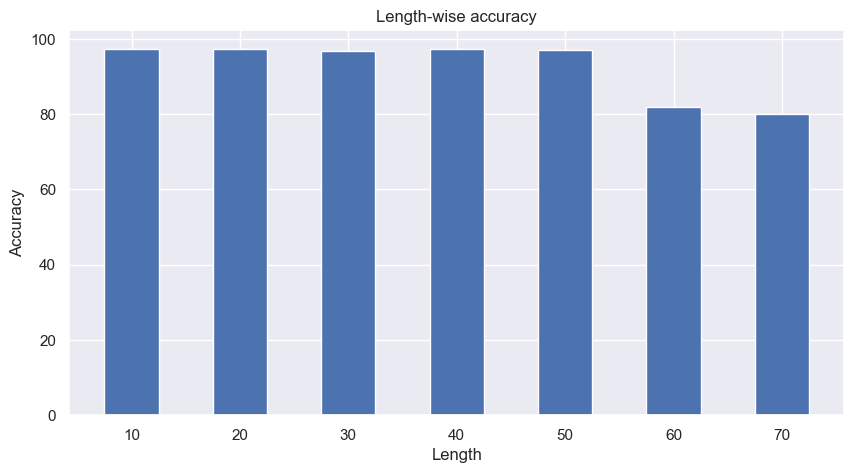

In [30]:
# from above, remove those cases where total predictions is less than 10
# length_correct_total = {length: (correct_predictions, total_predictions) for length, (correct_predictions, total_predictions) in length_correct_total.items() if total_predictions >= 10}

# Analyze length-wise statistics by classifying into bins and plotting
# bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100]
bins = [10, 20, 30, 40, 50, 60, 70]
flag = 0
length_correct_total_binned = {bin: [0, 0] for bin in bins}
for length, (correct_predictions, total_predictions) in length_correct_total.items():
    for bin in bins:
        if length <= bin:
            length_correct_total_binned[bin][0] += correct_predictions
            length_correct_total_binned[bin][1] += total_predictions
            flag = 1
            break


for bin, (correct_predictions, total_predictions) in length_correct_total_binned.items():
    accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    print(f"Length {bin} - Accuracy: {accuracy:.2f}% (Correct: {correct_predictions}, Total: {total_predictions})")

# Plot length-wise statistics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

lengths = [length for length in length_correct_total_binned.keys()]
accuracies = [correct_predictions / total_predictions * 100 if total_predictions > 0 else 0 for correct_predictions, total_predictions in length_correct_total_binned.values()]

plt.figure(figsize=(10, 5))
plt.bar(lengths, accuracies, width=5)
plt.xlabel("Length")
plt.ylabel("Accuracy")
plt.title("Length-wise accuracy")

# Display accuracy values on the bars with exactly one decimal place
# for i, v in enumerate(accuracies):
#     plt.text(lengths[i], v, f"{v:.1f}%", ha='center', va='bottom', fontsize=8)


plt.show()


kamal
kamal
born
born
renowned
social
worker


/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_25947/1830686344.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bow_input = torch.tensor(bow_representation, dtype=torch.float32).to(device)


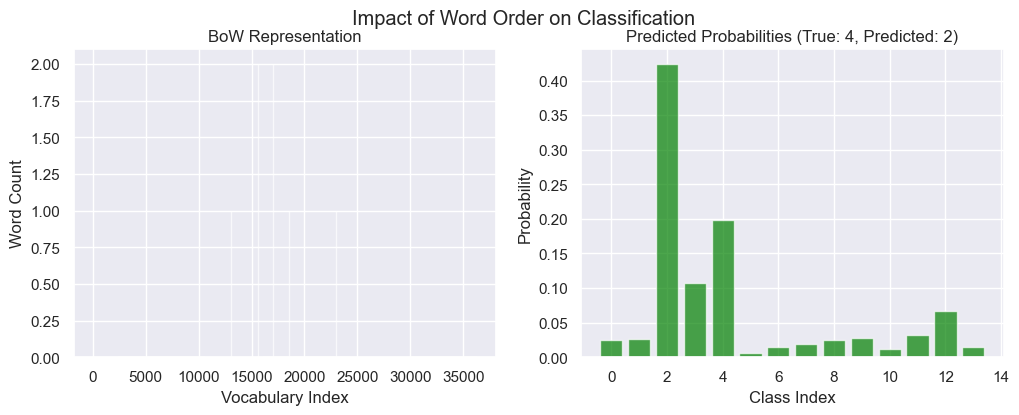

In [77]:

# Function to visualize the impact of word order on classification
def visualize_sequential_impact(model, test_data, test_tokens, true_labels, predictions, index):
    # Get the input sequence and true/predicted labels
    input_sequence = test_data[index]
    true_label = true_labels[index]
    predicted_label = predictions[index]

    # Get the BoW representation of the input sequence
    bow_representation = torch.zeros((1, len(vocab)), dtype=torch.float32)
    for token in test_tokens[index]:
        print(token)
        if token in vocab_dict:
            bow_representation[0][vocab_dict[token]] += 1
        else:
            bow_representation[0][vocab_dict['UNK']] += 1

    # Convert BoW representation to tensor
    bow_input = torch.tensor(bow_representation, dtype=torch.float32).to(device)

    # Get the output probabilities from the model
    output_probs = model(bow_input).softmax(dim=1).detach().cpu().numpy()

    # Plot the impact of word order on classification
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(vocab)), bow_representation.squeeze().numpy(), color='yellow', alpha=0.7)
    plt.title('BoW Representation')
    plt.xlabel('Vocabulary Index')
    plt.ylabel('Word Count')

    plt.subplot(1, 2, 2)
    plt.bar(range(output_probs.shape[1]), output_probs.squeeze(), color='green', alpha=0.7)
    plt.title(f'Predicted Probabilities (True: {true_label}, Predicted: {predicted_label})')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')

    plt.suptitle('Impact of Word Order on Classification')
    plt.show()

# Choose an index of a misclassified example
misclassified_index = misclassified[0]

# Visualize the impact of word order on classification for the selected example
visualize_sequential_impact(model, test_data, test_tokens, true_labels, predictions, misclassified_index)



/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_25947/2121117068.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bow_input = torch.tensor(bow_representation, dtype=torch.float32).to(device)
/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_25947/2121117068.py:34: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(non_zero_indices, non_zero_values, linefmt='yellow', markerfmt='yo', use_line_collection=True)


ValueError: too many values to unpack (expected 1)

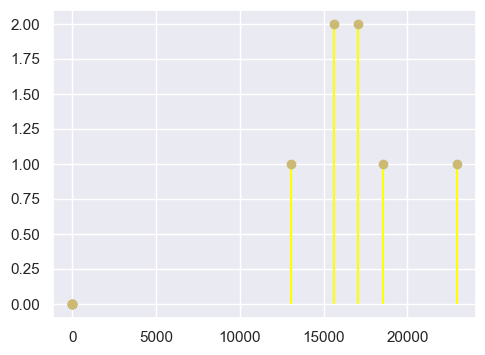

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the impact of word order on classification
def visualize_sequential_impact(model, test_data, test_tokens, true_labels, predictions, index):
    # Get the input sequence and true/predicted labels
    input_sequence = test_data[index]
    true_label = true_labels[index]
    predicted_label = predictions[index]

    # Get the BoW representation of the input sequence
    bow_representation = torch.zeros((1, len(vocab)), dtype=torch.float32)
    for token in test_tokens[index]:
        if token in vocab_dict:
            bow_representation[0][vocab_dict[token]] += 1
        else:
            bow_representation[0][vocab_dict['UNK']] += 1

    # Filter non-zero values
    non_zero_indices = bow_representation.nonzero().squeeze().numpy()
    non_zero_values = bow_representation.squeeze().numpy()[non_zero_indices]

    # Convert BoW representation to tensor
    bow_input = torch.tensor(bow_representation, dtype=torch.float32).to(device)

    # Get the output probabilities from the model
    output_probs = model(bow_input).softmax(dim=1).detach().cpu().numpy()

    # Plot the impact of word order on classification
    plt.figure(figsize=(12, 4))
    
    # Plot for BoW Representation
    plt.subplot(1, 2, 1)
    plt.stem(non_zero_indices, non_zero_values, linefmt='yellow', markerfmt='yo', use_line_collection=True)
    plt.title('BoW Representation')
    plt.xlabel('Vocabulary Index')
    plt.ylabel('Word Count')

    # Plot for Predicted Probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(output_probs.shape[1]), output_probs.squeeze(), color='green', alpha=0.7)
    plt.title(f'Predicted Probabilities (True: {true_label}, Predicted: {predicted_label})')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')

    plt.suptitle('Impact of Word Order on Classification')
    plt.show()




# Choose an index of a misclassified example
misclassified_index = misclassified[0]

# Visualize the impact of word order on classification for the selected example
visualize_sequential_impact(model, test_data, test_tokens, true_labels, predictions, misclassified_index)


In [83]:
# After training
weights = model.linear.weight.detach().cpu().numpy()

# Match each weight with its corresponding word in the vocabulary
word_weights = dict(zip(vocab, weights[0]))

# Sort the words based on their weights
sorted_words = sorted(word_weights.items(), key=lambda x: x[1], reverse=True)

# Print the top words and their weights
print("Top words and their weights:")
for word, weight in sorted_words[:10]:
    print(f"{word}: {weight}")


Top words and their weights:
publisher: 0.8011474609375
manufacturer: 0.765920877456665
imprint: 0.7042768001556396
publishes: 0.6848627924919128
label: 0.6814968585968018
press: 0.6668915748596191
publish: 0.6563386917114258
publishing: 0.6549798846244812
device: 0.6436018943786621
website: 0.6415697932243347


/var/folders/31/d7g63tw141g81ynhx4f_hngr0000gn/T/ipykernel_25947/859277043.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  bow_input = torch.tensor(bow_representation, dtype=torch.float32)


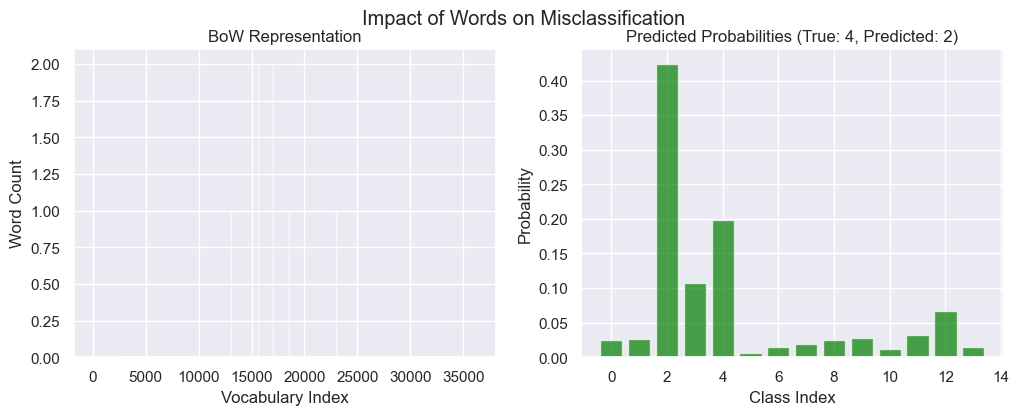

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_misclassification_impact(model, test_data, test_tokens, true_labels, predictions, vocab, index):
    # Get the input sequence and true/predicted labels
    input_sequence = test_data[index]
    true_label = true_labels[index]
    predicted_label = predictions[index]

    # Get the BoW representation of the input sequence
    bow_representation = torch.zeros((1, len(vocab)), dtype=torch.float32)
    for token in test_tokens[index]:
        if token in vocab:
            bow_representation[0][vocab[token]] += 1
        else:
            bow_representation[0][vocab['UNK']] += 1

    # Convert BoW representation to tensor
    bow_input = torch.tensor(bow_representation, dtype=torch.float32)

    # Get the output probabilities from the model
    output_probs = model(bow_input).softmax(dim=1).detach().cpu().numpy()

    # Get the weights of the linear layer
    weights = model.linear.weight.detach().cpu().numpy()

    # Calculate the impact of each word on the misclassification
    word_impact = bow_representation.numpy() * weights

    # Get the indices of non-zero values
    non_zero_indices = np.nonzero(word_impact)[1]

    # Plot the impact of words on misclassification
    plt.figure(figsize=(12, 4))

    # Plot for BoW Representation
    plt.subplot(1, 2, 1)
    plt.bar(range(len(vocab)), bow_representation.squeeze().numpy(), color='yellow', alpha=0.7)
    plt.title('BoW Representation')
    plt.xlabel('Vocabulary Index')
    plt.ylabel('Word Count')

    # Plot for Predicted Probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(output_probs.shape[1]), output_probs.squeeze(), color='green', alpha=0.7)
    plt.title(f'Predicted Probabilities (True: {true_label}, Predicted: {predicted_label})')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')

    plt.suptitle('Impact of Words on Misclassification')
    plt.show()

# Assuming misclassified is a list of indices of misclassified examples
# Choose an index of a misclassified example
misclassified_index = misclassified[0]

# Visualize the impact of words on misclassification for the selected example
visualize_misclassification_impact(model, test_data, test_tokens, true_labels, predictions, vocab_dict, misclassified_index)


In [87]:
# After training
weights = model.linear.weight.detach().cpu().numpy()

# Match each weight with its corresponding word in the vocabulary
word_weights = dict(zip(vocab, weights[0]))

# Sort the words based on their weights
sorted_words = sorted(word_weights.items(), key=lambda x: x[1], reverse=True)

# Print the top words and their weights
print("Top words and their weights:")
for word, weight in sorted_words[:10]:
    print(f"{word}: {weight}")

# Assuming misclassified is a list of indices of misclassified examples
for misclassified_index in misclassified:
    # Get the BoW representation of the misclassified input
    bow_representation = torch.zeros((1, len(vocab)), dtype=torch.float32)
    for token in test_tokens[misclassified_index]:
        if token in vocab:
            bow_representation[0][vocab[token]] += 1
        else:
            bow_representation[0][vocab['UNK']] += 1
    
    # Calculate the impact of each word on the misclassification
    word_impact = bow_representation.numpy() * weights

    # Find the indices of the top words influencing the misclassification
    top_word_indices = np.argsort(word_impact)[0][-10:]  # Adjust the number as needed

    # Get the corresponding words from the vocabulary
    top_words = [list(vocab.keys())[list(vocab.values()).index(idx)] for idx in top_word_indices]

    print(f"Top words in misclassified example {misclassified_index}: {top_words}")


Top words and their weights:
publisher: 0.8011474609375
manufacturer: 0.765920877456665
imprint: 0.7042768001556396
publishes: 0.6848627924919128
label: 0.6814968585968018
press: 0.6668915748596191
publish: 0.6563386917114258
publishing: 0.6549798846244812
device: 0.6436018943786621
website: 0.6415697932243347


TypeError: 'set' object is not subscriptable

In [93]:
for misclassified_index in misclassified:
    # Get the tokens of the misclassified example
    example_tokens = test_tokens[misclassified_index]

    # Check if any of the top words with highest weights are present in the example tokens
    top_words = [word for word, _ in sorted_words[:10]]
    matching_words = set(example_tokens) & set(top_words)

    if matching_words:
        print(f"Misclassified example {misclassified_index} contains top words: {matching_words}")
    # print the example tokens
        print(f"Example tokens: {example_tokens}")
        # print the true label and predicted label
        print(f"True label: {true_labels[misclassified_index]}")
        print(f"Predicted label: {predictions[misclassified_index]}")
        print()

# total number of misclassified examples
total_misclassified = len(misclassified)
print(f"Total number of misclassified examples: {total_misclassified}")

Misclassified example 535 contains top words: {'publishing', 'imprint'}
Example tokens: ['marvel', 'illustrated', 'marvel', 'illustrated', 'marvel', 'comics', 'publishing', 'imprint', 'specializing', 'comic', 'book', 'classic', 'literature', 'novel', 'story', 'told', 'form', 'limited', 'series', 'issues', 'later', 'collected', 'trade', 'paperback']
True label: 0
Predicted label: 13

Misclassified example 698 contains top words: {'publisher'}
Example tokens: ['magic', 'pen', 'joseph', 'magic', 'pen', 'joseph', 'study', 'american', 'illustrator', 'joseph', 'walt', 'reed', 'first', 'published', 'donald', 'grant', 'publisher', 'inc', 'edition', 'copies', 'numbered', 'signed', 'author']
True label: 13
Predicted label: 2

Misclassified example 3005 contains top words: {'publishes'}
Example tokens: ['institution', 'mechanical', 'engineers', 'part', 'journal', 'engineering', 'maritime', 'environment', 'journal', 'engineering', 'maritime', 'environment', 'part', 'institution', 'mechanical', 'en